In [9]:
# import necessary modules
# uncomment to get plots displayed in notebook

from platform import python_version

print(python_version())

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math
import matplotlib.animation as animation
from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker
import matplotlib.patches as patches_py
from scipy import interpolate
import ast


3.8.5


In [10]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [162]:
BG = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_t0_background.dat')

z_ar = BG[:,0]
tau_ar = BG[:,1]
mod_t_cmb_f = BG[:,28]
mod_t_cmb_df_dz = BG[:,29]
mod_t_cmb_dy = BG[:,30]

(1.0, 10000.0)

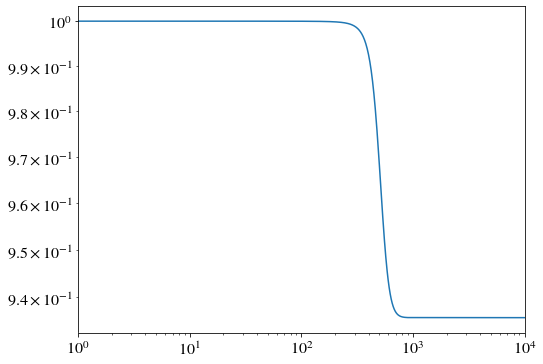

In [163]:
plt.plot(1.+z_ar,mod_t_cmb_f)
plt.loglog()
plt.xlim(1.,1e4)

(1.0, 10000.0)

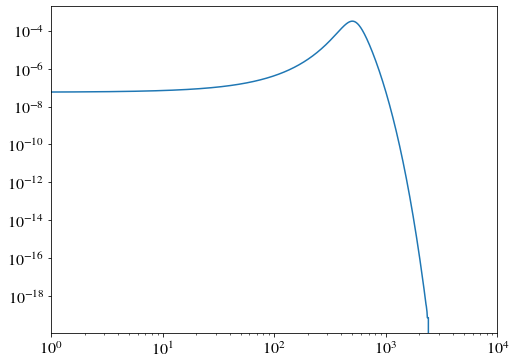

In [164]:
plt.plot(1.+z_ar,mod_t_cmb_df_dz)
plt.loglog()
plt.xlim(1.,1e4)

In [165]:
np.trapz(mod_t_cmb_dy,tau_ar)

25587.651323714093

(1.0, 10000.0)

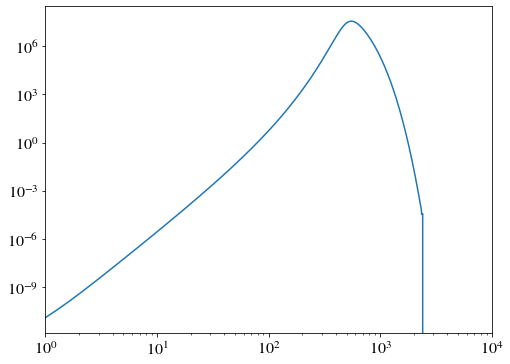

In [166]:
plt.plot(1.+z_ar,mod_t_cmb_dy)
plt.loglog()
plt.xlim(1.,1e4)

(1.0, 3000.0)

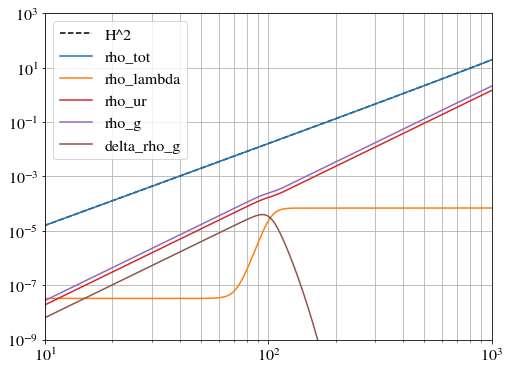

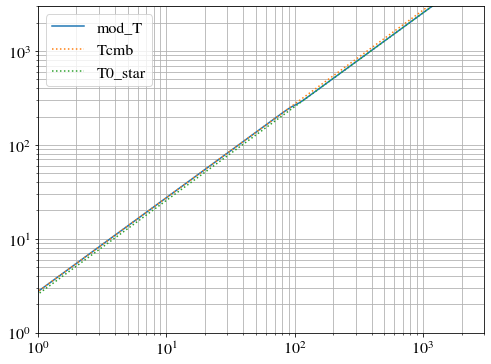

In [197]:
BG = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_t0_background.dat')
z_ar = BG[:,0]
rho_crit_ar = BG[:,21]
rho_tot_ar = BG[:,22]
rho_mod_lambda_ar = BG[:,17]
rho_lambda_ar = BG[:,19]
rho_ur_ar = BG[:,20]
rho_g_ar = BG[:,8]
delta_rho_g_ar = BG[:,18]
mod_Tcmb = BG[:,16]
mod_rho_g_ar = BG[:,27]
H_ar = BG[:,3]

fig_BG, ax_BG = plt.subplots()
fig_T, ax_T = plt.subplots()
ax_BG.plot(1.+z_ar,H_ar**2,label='H^2',ls='--',c='k')
ax_BG.plot(1.+z_ar,rho_tot_ar,label='rho_tot')
ax_BG.plot(1.+z_ar,rho_lambda_ar,label='rho_lambda')
# ax_BG.plot(1.+z_ar,rho_mod_lambda_ar,label='mod_rho_lambda')
ax_BG.plot(1.+z_ar,-rho_mod_lambda_ar,ls='--')
ax_BG.plot(1.+z_ar,rho_ur_ar,label='rho_ur')
ax_BG.plot(1.+z_ar,rho_g_ar,label='rho_g')

ax_BG.plot(1.+z_ar,delta_rho_g_ar,label='delta_rho_g')
# ax_BG.plot(1.+z_ar,mod_rho_g_ar,label='mod_rho_g')
ax_BG.loglog()
ax_BG.grid(which='both')
ax_BG.legend(loc=2)
ax_BG.set_xlim(1.e1, 1e3)
ax_BG.set_ylim(1.e-9, 1e3)

Tcmb = 2.7255
T0star = 2.55
ax_T.plot(1.+z_ar,mod_Tcmb,label='mod_T')
ax_T.plot(1.+z_ar,Tcmb*(1.+z_ar),label='Tcmb',ls=':')
ax_T.plot(1.+z_ar,T0star*(1.+z_ar),label='T0_star',ls=':')
ax_T.grid(which='both')
ax_T.loglog()
ax_T.legend(loc=2)
ax_T.set_xlim(1., 3e3)
ax_T.set_ylim(1., 3e3)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.79508181e-13, 6.60713625e-13, 6.43118455e-13])

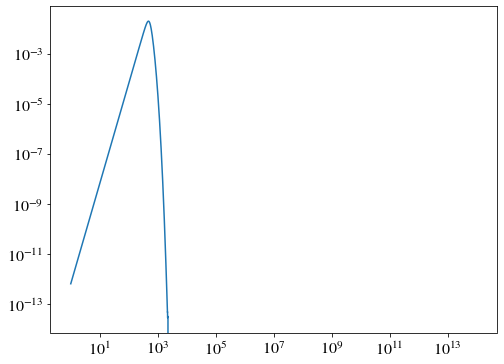

In [174]:
plt.plot(1.+z_ar,delta_rho_g_ar,label='delta_rho_g')
plt.loglog()
# plt.xlim(1.,1e4)
delta_rho_g_ar

more serious stuff:

In [3]:
# requires ffmpeg
# on mac the conda-forge install seem to crash due to wrongly assigned files
# the easiest see to be to install ffmpeg via brew (make sure to have deleted to conda ffmpeg)
T0_values= np.linspace(2.55,3.3,1)

var_name = 'T0_star'
var_array = T0_values
var_num = len(var_array)
var_legend = r'$T_0^\star$'

In [4]:
# var = 2.55
# omega_ncdm = 0.0006451439*(var/2.7255)**4
# print(omega_ncdm)

In [ ]:
nx = len(var_array)
x = []
y = []
y_EE = []
y_TE = []
y_PP = []
hubble_list = []
zrec_list = []
z_h = 100.
delta_z_h = 0.1*z_h

index_pb = []

z_bg = []
rho_g_bg = []
rho_b_bg = []
rho_cdm_bg = []
rho_lambda_bg = []
rho_ur_bg = []
rho_ncdm_bg = []
rho_tot_bg = []
T_cmb_bg = []
Omega_cb_bg = []

for i,var in enumerate(var_array):
    #T0 = T0_values[i]

    common_settings = {'output':'tCl,pCl,lCl,mPk',
                       'lensing':'yes',
                       '100*theta_s': 1.04110,
                       'recombination':'HyRec',
                       'n_s':0.9649,
                       'tau_reio':0.0525,
                       'k_pivot':0.05,
                    'N_ur' : 3.046,
                    'N_ncdm' : 0,
#                     'omega_ncdm' : 0.0006451439,
                       'z_h' : z_h,
                       'delta_z_h' : delta_z_h,
                       'P_k_max_1/Mpc':100.0,
                       'l_switch_limber':9,
                      'background_verbose' : 3}

    var_alpha = 1.
    omega_cdm = 0.12*(var/2.7255)**3
    omega_b = 0.02237*(var/2.7255)**3
    As = 2.089e-9*(2.7255/var)**(0.9649-1)
    #omega_ncdm = 0.0006451439*(var/2.7255)**4

    
    print(' * Compute with %s=%e'%(var_name,var))
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
    #M.set({'omega_ncdm':omega_ncdm})
    M.set({'A_s':As})
    M.set({var_name:var})
    try:
        M.compute()
    except:
        M.struct_cleanup()  # clean output
        M.empty()           # clean input
        index_pb.append(i)
        continue
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    clTE = clM['te'][2:]

    z_ar = M.get_background()['z']
    rho_g_ar = M.get_background()['(.)rho_g']
    rho_b_ar = M.get_background()['(.)rho_b']
    rho_cdm_ar = M.get_background()['(.)rho_cdm']
    #rho_ncdm_ar = M.get_background()['(.)rho_ncdm[0]']
    rho_lambda_ar = M.get_background()['(.)rho_lambda']
    rho_ur_ar = M.get_background()['(.)rho_ur']
    rho_tot_ar = M.get_background()['(.)rho_tot']
    Omega_tot_ar = M.get_background()['Omega_tot']
    Omega_cb_ar = M.get_background()['Omega_cb']
    T_cmb_ar = M.get_background()['mod_T_cmb']

    # collect some derived params
    derived = M.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda',
                                                'age','sigma8','z_rec',
                                                'm_ncdm_in_eV',
                                                'm_ncdm_tot','Neff'])
    h=M.h()
    zrec = derived['z_rec']
    zrec_list.append(zrec)
    hubble_list.append(h)
    zdec = derived['z_d']
    rdec=M.rs_drag()
    mnu = derived['m_ncdm_in_eV']
    mnu_tot = derived['m_ncdm_tot']
    print(' * r_s=%f'%(derived['rs_rec']))
    print(' * r_d a_d=%f'%(rdec/(1+zdec)))
    print(' * D_A=%f'%(derived['da_rec']))
    print(' * T_rec=%f'%(var*(1+zrec)))
    print(' * z_rec=%f'%(derived['z_rec']))
    print(' * z_d=%f'%(derived['z_d']))
    print(' * Omega_Lambda=%f'%(derived['Omega_Lambda']))
    print(' * age=%f'%(derived['age']))
    print(' * sigma8=%f'%(derived['sigma8']))
    print(' * h=%f'%(h))
    print(' * mnu=%f'%(mnu))
    print(' * mnu_tot=%f'%(mnu_tot))
    print(' * Neff=%f'%(derived['Neff']))
    #print(M.get_current_derived_parameters(['m_ncdm_in_eV','m_ncdm_tot']))
    
    
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    x.append(ll)
    y.append(clTT)
    y_EE.append(clEE)
    y_TE.append(clTE)
    y_PP.append(clPP)
    
    z_bg.append(z_ar)
    rho_g_bg.append(rho_g_ar)
    rho_b_bg.append(rho_b_ar)
    rho_cdm_bg.append(rho_cdm_ar)
    rho_lambda_bg.append(rho_lambda_ar)
    rho_ur_bg.append(rho_ur_ar)
    rho_ncdm_bg.append(rho_ncdm_ar)
    rho_tot_bg.append(rho_tot_ar)
    T_cmb_bg.append(T_cmb_ar)
    Omega_cb_bg.append(Omega_cb_ar)

var_array = np.delete(var_array,index_pb)
    

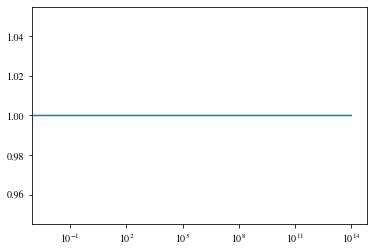

In [59]:
plt.plot(z_ar,Omega_tot_ar+rho_ur_ar/rho_tot_ar)
plt.xscale('log')

varying T0 like Ivanov et al 

 * Compute with T0_star=2.425000e+00
 * r_s=162.362746
 * r_d a_d=0.138512
 * D_A=12.726107
 * T_rec=2971.737237
 * z_rec=1224.458654
 * z_d=1191.986112
 * Omega_Lambda=0.806435
 * age=14.314002
 * sigma8=0.946301
 * h=0.774555
 * Compute with T0_star=2.525000e+00
 * r_s=155.932431
 * r_d a_d=0.138512
 * D_A=12.726088
 * T_rec=2971.740324
 * z_rec=1175.926861
 * z_d=1144.742853
 * Omega_Lambda=0.765444
 * age=14.126988
 * sigma8=0.908749
 * h=0.747601
 * Compute with T0_star=2.625000e+00
 * r_s=149.992152
 * r_d a_d=0.138512
 * D_A=12.726091
 * T_rec=2971.740212
 * z_rec=1131.091509
 * z_d=1101.095698
 * Omega_Lambda=0.716398
 * age=13.948910
 * sigma8=0.871908
 * h=0.720680
 * Compute with T0_star=2.725000e+00
 * r_s=144.487858
 * r_d a_d=0.138512
 * D_A=12.726088
 * T_rec=2971.740064
 * z_rec=1089.546813
 * z_d=1060.651789
 * Omega_Lambda=0.657706
 * age=13.779020
 * sigma8=0.835709
 * h=0.693833
 * Compute with T0_star=2.825000e+00
 * r_s=139.373247
 * r_d a_d=0.138512
 * D_A=12.726

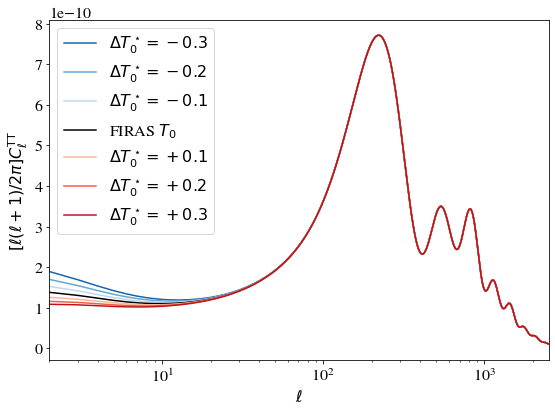

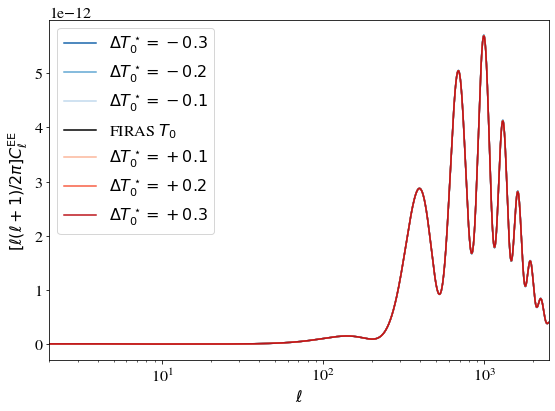

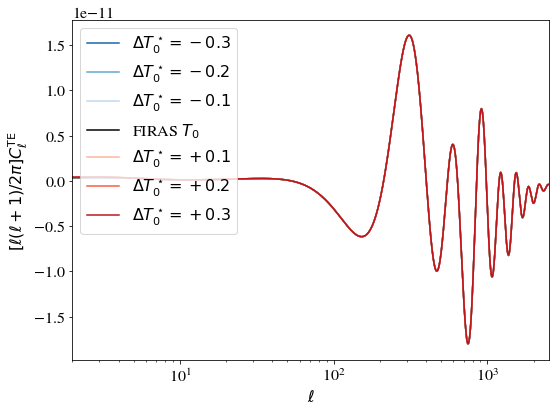

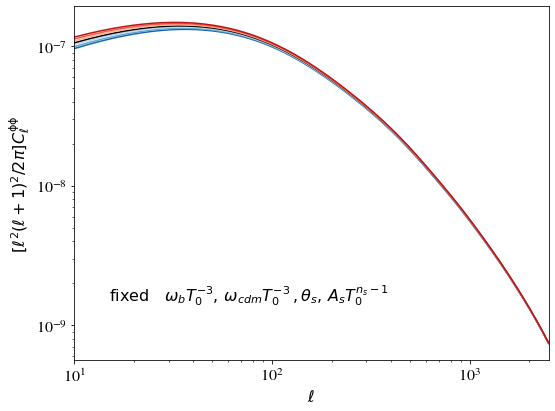

In [3]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'T0_star'
var_array = np.linspace(2.425,3.025,7)
#var_array = np.linspace(2.1,3.025,7)
var_num = len(var_array)
var_legend = r'$T_0^\star$'
var_figname = 'T0_star'
#
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   '100*theta_s': 1.04110,
                   'recombination':'HyRec',
                   'T_cmb' : 2.725,
                   # LambdaCDM parameters
#                    'h':0.6737,
#                    'omega_b':0.02237,
#                    'omega_cdm':0.120,
#                    'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                    # 'YHe':0.246,
                    'z_h' : -100,
                    'delta_z_h' : 10.,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9}
                   #'background_verbose':1}  
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
# fig_Pk, ax_Pk = plt.subplots()
# fig_Pkz, ax_Pkz = plt.subplots()
fig_TT, ax_TT = plt.subplots()
fig_EE, ax_EE = plt.subplots()
fig_TE, ax_TE = plt.subplots()
fig_PP, ax_PP = plt.subplots()
#
# loop over varying parameter values
#1191.287902
z_decs=[1191.287902,1144.085933,1100.504630,1060.120895,1022.593945,987.631692,954.979257]
# z_decs=np.zeros(len(var_array))

for i,var in enumerate(var_array):
    
    var_alpha = 1.
    omega_cdm = 0.12*(var/2.725)**3
    omega_b = 0.02237*(var/2.725)**3
    As = 2.089e-9*(2.725/var)**(0.9649-1)
#     k_piv = 0.05*(var/2.725)
    z_pk =z_decs[i]
#     atoday = 2.725/var;
    #
    print(' * Compute with %s=%e'%(var_name,var))
    #
    # deal with colors and legends
    #
    if i == 3:
        var_color = 'k'
        var_alpha = 1.
        legarray.append(r'FIRAS $T_0$')
    else:
        if i < 3:
            var_color = plt.cm.Blues(0.8*(3-i)/(3))
#         var_color = 'r'
#             var_alpha = 1.*i/(var_num-1)
#     if i == var_num-1:
            legarray.append(r'$\Delta T_{0}^\star=%0.1f$'%(var-2.725))
        if i > 3:
            var_color = plt.cm.Reds(0.8*(i-3)/(3))
#             var_alpha = 1.*i/(var_num-1)
            legarray.append(r'$\Delta T_{0}^\star=+%0.1f$'%(var-2.725))
    
    
        #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
#     M.set({'a_today':atoday})
    M.set({'A_s':As})
#     M.set({'z_pk':z_pk})
#     M.set({'k_pivot':k_piv})
    M.set({var_name:var})
    M.compute()
    derived = M.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec'])
    h=M.h()
    zrec=derived['z_rec']
    zdec=derived['z_d']
    rdec=M.rs_drag()
    print (' * r_s=%f'%(derived['rs_rec']))
    print (' * r_d a_d=%f'%(rdec/(1+zdec)))
    print (' * D_A=%f'%(derived['da_rec']))
    print (' * T_rec=%f'%(var*(1+zrec)))
    print (' * z_rec=%f'%(derived['z_rec']))
    print (' * z_d=%f'%(derived['z_d']))
    print (' * Omega_Lambda=%f'%(derived['Omega_Lambda']))
    print (' * age=%f'%(derived['age']))
    print (' * sigma8=%f'%(derived['sigma8']))
    print (' * h=%f'%(h))
    
    #
    # get Cls
    #
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    clTE = clM['te'][2:]
    #
    # get P(k) for common k values
    #
#     pkM = []
#     pkMz = []
#     for k in kvec:
#         heff = (2.725/var)**(1.)
#         pkM.append(M.pk(k/heff,0.)*k/heff**3)
#         pkMz.append(M.pk(k/heff,z_pk)*k/heff**3)
#     #    
#     # plot P(k)
#     #
#     ax_Pk.semilogx(kvec,np.array(pkM),color=var_color,alpha=var_alpha,linestyle='-')
#     ax_Pkz.semilogx(kvec,np.array(pkMz),color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
#     ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl EE 
    #
    ax_EE.semilogx(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    ax_TE.semilogx(ll,clTE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')

#     ax_EE.semilogy(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl phiphi
    #
    ax_PP.loglog(ll,clPP*ll*(ll+1)*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    M.empty()    

#
# output of P(k) figure
#
# ax_Pk.set_xlim([1.e-4,1.])
# ax_Pk.set_xlabel(r'$k \,\,\,\, [\hat{T}_0\cdot\mathrm{Mpc}^{-1}]$')
# ax_Pk.set_ylabel(r'$kP(k) \,\,\,\, [\hat{T}_0^{-1}\cdot\mathrm{Mpc}]^2\,, \,\,\,\, z=0$')
# ax_Pk.annotate(r'${\rm fixed}\quad \omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}$',
#                  xy=(3e-3,0),
#                  xytext=(3e-3,0)
#               )
# ax_Pk.legend(legarray)
# fig_Pk.tight_layout()
# fig_Pk.savefig('spectra_%s_Pk.pdf' % var_figname)

# ax_Pkz.set_xlim([1.e-4,1.])
# ax_Pkz.set_xlabel(r'$k \,\,\,\, [\hat{T}_0\cdot\mathrm{Mpc}^{-1}]$')
# ax_Pkz.set_ylabel(r'$kP(k) \,\,\,\, [\hat{T}_0^{-1}\cdot\mathrm{Mpc}]^2\,, \,\,\,\, z=z_{\rm dec}$')
# ax_Pkz.legend(legarray)
# fig_Pkz.tight_layout()
# fig_Pkz.savefig('spectra_%s_Pkz.pdf' % var_figname)

#
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)
#


# output of C_l^EE figure
#    
ax_EE.set_xlim([2,2500])
ax_EE.set_xlabel(r'$\ell$')
ax_EE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
ax_EE.legend(legarray)
fig_EE.tight_layout()
fig_EE.savefig('spectra_%s_clee.pdf' % var_figname)


ax_TE.set_xlim([2,2500])
ax_TE.set_xlabel(r'$\ell$')
ax_TE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TE}$')
ax_TE.legend(legarray)
fig_TE.tight_layout()
fig_TE.savefig('spectra_%s_clte.pdf' % var_figname)
# ax_TE.annotate(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                  xy=(3,1e-11),
#                  xytext=(3,1e-11))
# ax_TE.legend(fontsize='8',ncol=1,loc='lower left')
# ax_TE.legend(legarray.append(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$'))


#
# output of C_l^pp figure
#   
ax_PP.set_xlim([10,2500])
ax_PP.set_xlabel(r'$\ell$')
ax_PP.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$')
ax_PP.annotate(r'${\rm fixed}\quad \omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}$',
#                loc='lower left'
                 xy=(15,1.5e-9),
                 xytext=(15,1.5e-9)
              )
# ax_PP.legend(legarray)
# ax_PP.legend(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                loc='lower left'
# #                  xy=(10.5,1e-9),
# #                  xytext=(10.5,1e-9)
#               )
fig_PP.tight_layout()
fig_PP.savefig('spectra_%s_clpp.pdf' % var_figname)

# computing with Ivanov et al params

 * Compute with T0_star=2.425000e+00
 * r_s=162.392583
 * r_d a_d=0.138546
 * D_A=12.728346
 * T_rec=2971.760279
 * z_rec=1224.468156
 * z_d=1191.949035
 * Omega_Lambda=0.788351
 * age=14.315055
 * sigma8=0.934485
 * h=0.783563
 * Compute with T0_star=2.525000e+00
 * r_s=155.961087
 * r_d a_d=0.138545
 * D_A=12.728328
 * T_rec=2971.763355
 * z_rec=1175.935982
 * z_d=1144.707332
 * Omega_Lambda=0.752622
 * age=14.128030
 * sigma8=0.895874
 * h=0.754142
 * Compute with T0_star=2.625000e+00
 * r_s=150.019716
 * r_d a_d=0.138545
 * D_A=12.728331
 * T_rec=2971.763263
 * z_rec=1131.100291
 * z_d=1101.061586
 * Omega_Lambda=0.709330
 * age=13.949941
 * sigma8=0.857688
 * h=0.724492
 * Compute with T0_star=2.725000e+00
 * r_s=144.514410
 * r_d a_d=0.138545
 * D_A=12.728328
 * T_rec=2971.763110
 * z_rec=1089.555270
 * z_d=1060.618911
 * Omega_Lambda=0.656730
 * age=13.780042
 * sigma8=0.819821
 * h=0.694619
 * Compute with T0_star=2.825000e+00
 * r_s=139.398860
 * r_d a_d=0.138545
 * D_A=12.728

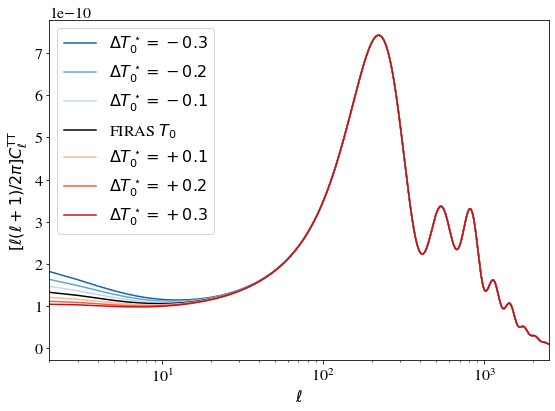

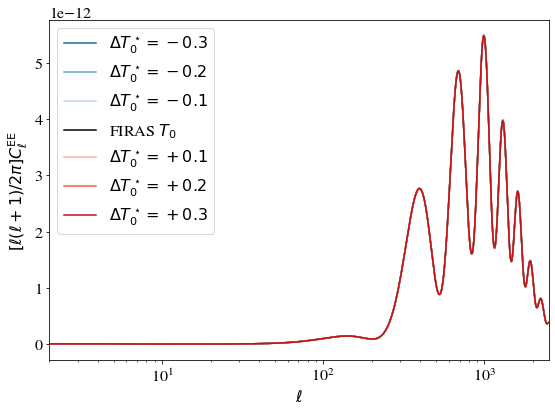

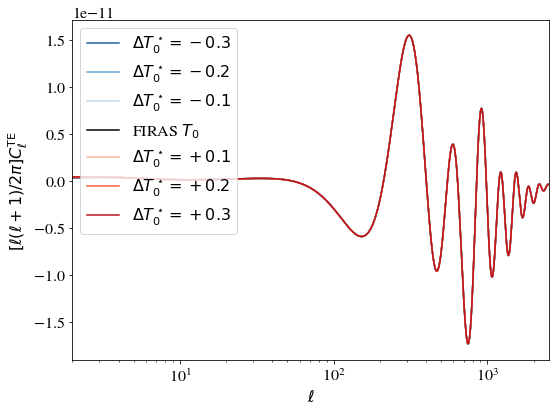

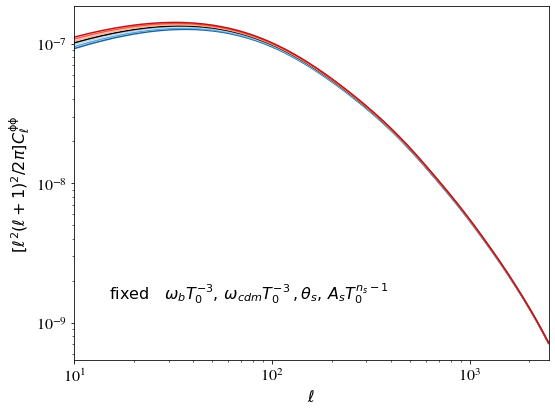

In [4]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'T0_star'
var_array = np.linspace(2.425,3.025,7)
#var_array = np.linspace(2.1,3.025,7)
var_num = len(var_array)
var_legend = r'$T_0^\star$'
var_figname = 'T0_star'
#
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   '100*theta_s': 1.04110,
                   'recombination':'HyRec',
                   'T_cmb' : 2.725,
                   # LambdaCDM parameters
#                    'h':0.6737,
#                    'omega_b':0.02237,
#                    'omega_cdm':0.120,
#                    'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                    # 'YHe':0.246,
                    'z_h' : -100,
                    'delta_z_h' : 10.,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9}
                   #'background_verbose':1}  
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
# fig_Pk, ax_Pk = plt.subplots()
# fig_Pkz, ax_Pkz = plt.subplots()
fig_TT, ax_TT = plt.subplots()
fig_EE, ax_EE = plt.subplots()
fig_TE, ax_TE = plt.subplots()
fig_PP, ax_PP = plt.subplots()
#
# loop over varying parameter values
#1191.287902
z_decs=[1191.287902,1144.085933,1100.504630,1060.120895,1022.593945,987.631692,954.979257]
# z_decs=np.zeros(len(var_array))

for i,var in enumerate(var_array):
    
    var_alpha = 1.
    bar_omega_cdm = 0.12
    bar_omega_b = 0.02237
    bar_ln10_10_As = 3.
#     k_piv = 0.05*(var/2.725)
    z_pk =z_decs[i]
#     atoday = 2.725/var;
    #
    print(' * Compute with %s=%e'%(var_name,var))
    #
    # deal with colors and legends
    #
    if i == 3:
        var_color = 'k'
        var_alpha = 1.
        legarray.append(r'FIRAS $T_0$')
    else:
        if i < 3:
            var_color = plt.cm.Blues(0.8*(3-i)/(3))
#         var_color = 'r'
#             var_alpha = 1.*i/(var_num-1)
#     if i == var_num-1:
            legarray.append(r'$\Delta T_{0}^\star=%0.1f$'%(var-2.725))
        if i > 3:
            var_color = plt.cm.Reds(0.8*(i-3)/(3))
#             var_alpha = 1.*i/(var_num-1)
            legarray.append(r'$\Delta T_{0}^\star=+%0.1f$'%(var-2.725))
    
    
        #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({'bar_omega_b':bar_omega_b})
    M.set({'bar_omega_cdm':bar_omega_cdm})
#     M.set({'a_today':atoday})
    M.set({'bar_ln10_10_A_s':bar_ln10_10_As})
#     M.set({'z_pk':z_pk})
#     M.set({'k_pivot':k_piv})
    M.set({var_name:var})
    M.compute()
    derived = M.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec'])
    h=M.h()
    zrec=derived['z_rec']
    zdec=derived['z_d']
    rdec=M.rs_drag()
    print (' * r_s=%f'%(derived['rs_rec']))
    print (' * r_d a_d=%f'%(rdec/(1+zdec)))
    print (' * D_A=%f'%(derived['da_rec']))
    print (' * T_rec=%f'%(var*(1+zrec)))
    print (' * z_rec=%f'%(derived['z_rec']))
    print (' * z_d=%f'%(derived['z_d']))
    print (' * Omega_Lambda=%f'%(derived['Omega_Lambda']))
    print (' * age=%f'%(derived['age']))
    print (' * sigma8=%f'%(derived['sigma8']))
    print (' * h=%f'%(h))
    
    #
    # get Cls
    #
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    clTE = clM['te'][2:]
    #
    # get P(k) for common k values
    #
#     pkM = []
#     pkMz = []
#     for k in kvec:
#         heff = (2.725/var)**(1.)
#         pkM.append(M.pk(k/heff,0.)*k/heff**3)
#         pkMz.append(M.pk(k/heff,z_pk)*k/heff**3)
#     #    
#     # plot P(k)
#     #
#     ax_Pk.semilogx(kvec,np.array(pkM),color=var_color,alpha=var_alpha,linestyle='-')
#     ax_Pkz.semilogx(kvec,np.array(pkMz),color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
#     ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl EE 
    #
    ax_EE.semilogx(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    ax_TE.semilogx(ll,clTE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')

#     ax_EE.semilogy(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl phiphi
    #
    ax_PP.loglog(ll,clPP*ll*(ll+1)*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    M.empty()    

#
# output of P(k) figure
#
# ax_Pk.set_xlim([1.e-4,1.])
# ax_Pk.set_xlabel(r'$k \,\,\,\, [\hat{T}_0\cdot\mathrm{Mpc}^{-1}]$')
# ax_Pk.set_ylabel(r'$kP(k) \,\,\,\, [\hat{T}_0^{-1}\cdot\mathrm{Mpc}]^2\,, \,\,\,\, z=0$')
# ax_Pk.annotate(r'${\rm fixed}\quad \omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}$',
#                  xy=(3e-3,0),
#                  xytext=(3e-3,0)
#               )
# ax_Pk.legend(legarray)
# fig_Pk.tight_layout()
# fig_Pk.savefig('spectra_%s_Pk.pdf' % var_figname)

# ax_Pkz.set_xlim([1.e-4,1.])
# ax_Pkz.set_xlabel(r'$k \,\,\,\, [\hat{T}_0\cdot\mathrm{Mpc}^{-1}]$')
# ax_Pkz.set_ylabel(r'$kP(k) \,\,\,\, [\hat{T}_0^{-1}\cdot\mathrm{Mpc}]^2\,, \,\,\,\, z=z_{\rm dec}$')
# ax_Pkz.legend(legarray)
# fig_Pkz.tight_layout()
# fig_Pkz.savefig('spectra_%s_Pkz.pdf' % var_figname)

#
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)
#


# output of C_l^EE figure
#    
ax_EE.set_xlim([2,2500])
ax_EE.set_xlabel(r'$\ell$')
ax_EE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
ax_EE.legend(legarray)
fig_EE.tight_layout()
fig_EE.savefig('spectra_%s_clee.pdf' % var_figname)


ax_TE.set_xlim([2,2500])
ax_TE.set_xlabel(r'$\ell$')
ax_TE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TE}$')
ax_TE.legend(legarray)
fig_TE.tight_layout()
fig_TE.savefig('spectra_%s_clte.pdf' % var_figname)
# ax_TE.annotate(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                  xy=(3,1e-11),
#                  xytext=(3,1e-11))
# ax_TE.legend(fontsize='8',ncol=1,loc='lower left')
# ax_TE.legend(legarray.append(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$'))


#
# output of C_l^pp figure
#   
ax_PP.set_xlim([10,2500])
ax_PP.set_xlabel(r'$\ell$')
ax_PP.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$')
ax_PP.annotate(r'${\rm fixed}\quad \omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}$',
#                loc='lower left'
                 xy=(15,1.5e-9),
                 xytext=(15,1.5e-9)
              )
# ax_PP.legend(legarray)
# ax_PP.legend(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                loc='lower left'
# #                  xy=(10.5,1e-9),
# #                  xytext=(10.5,1e-9)
#               )
fig_PP.tight_layout()
fig_PP.savefig('spectra_%s_clpp.pdf' % var_figname)

# movie

compute fiducial model wit T=2.7255 K

In [3]:
var = 2.7255
var_name = 'T0_star'
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   '100*theta_s': 1.04110,
                    'N_ur' : 3.046,
                    'N_ncdm' : 0,
                    #'omega_ncdm' : 0.0006451439,
                   'recombination':'HyRec',
                   'thermodynamics_verbose' : 3,
                   'background_verbose' : 3,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                   'z_h' : 100.,
                   'delta_z_h' : 10.,
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9}

var_alpha = 1.
omega_cdm = 0.12*(var/2.7255)**3
omega_b = 0.02237*(var/2.7255)**3
As = 2.089e-9*(2.7255/var)**(0.9649-1)

M = Class()
M.set(common_settings)
M.set({'omega_b':omega_b})
M.set({'omega_cdm':omega_cdm})
M.set({'A_s':As})
M.set({var_name:var})
M.compute()
clM = M.lensed_cl(2500)

z_firas_ar = M.get_background()['z']
rho_g_firas_ar = M.get_background()['(.)rho_g']
rho_b_firas_ar = M.get_background()['(.)rho_b']
rho_cdm_firas_ar = M.get_background()['(.)rho_cdm']
rho_lambda_firas_ar = M.get_background()['(.)rho_lambda']
rho_ur_firas_ar = M.get_background()['(.)rho_ur']
rho_tot_firas_ar = M.get_background()['(.)rho_tot']
T_cmb_firas_ar = M.get_background()['mod_T_cmb']
Omega_cb_ar = M.get_background()['Omega_cb']

#print(M.get_current_derived_parameters(['m_ncdm_in_eV','m_ncdm_tot','Neff']))

M.struct_cleanup()  # clean output
M.empty()           # clean input
ll = clM['ell'][2:]
clTT = clM['tt'][2:]
clEE = clM['ee'][2:]
clPP = clM['pp'][2:]
clTE = clM['te'][2:]
x_firas = ll
y_firas = clTT
y_firas_EE = clEE
y_firas_PP = clPP
y_firas_TE = clTE

# vary T0

In [4]:
# requires ffmpeg
# on mac the conda-forge install seem to crash due to wrongly assigned files
# the easiest see to be to install ffmpeg via brew (make sure to have deleted to conda ffmpeg)
T0_values= np.linspace(2.55,3.3,1)

var_name = 'T0_star'
var_array = T0_values
var_num = len(var_array)
var_legend = r'$T_0^\star$'

In [57]:
# var = 2.55
# omega_ncdm = 0.0006451439*(var/2.7255)**4
# print(omega_ncdm)

In [58]:
nx = len(var_array)
x = []
y = []
y_EE = []
y_TE = []
y_PP = []
hubble_list = []
zrec_list = []
z_h = 100.
delta_z_h = 0.1*z_h

index_pb = []

z_bg = []
rho_g_bg = []
rho_b_bg = []
rho_cdm_bg = []
rho_lambda_bg = []
rho_ur_bg = []
rho_ncdm_bg = []
rho_tot_bg = []
T_cmb_bg = []
Omega_cb_bg = []

for i,var in enumerate(var_array):
    #T0 = T0_values[i]

    common_settings = {'output':'tCl,pCl,lCl,mPk',
                       'lensing':'yes',
                       '100*theta_s': 1.04110,
                       'recombination':'HyRec',
                       'n_s':0.9649,
                       'tau_reio':0.0525,
                       'k_pivot':0.05,
                    'N_ur' : 3.046,
                    'N_ncdm' : 0,
#                     'omega_ncdm' : 0.0006451439,
                       'z_h' : z_h,
                       'delta_z_h' : delta_z_h,
                       'P_k_max_1/Mpc':100.0,
                       'l_switch_limber':9,
                      'background_verbose' : 3}

    var_alpha = 1.
    omega_cdm = 0.12*(var/2.7255)**3
    omega_b = 0.02237*(var/2.7255)**3
    As = 2.089e-9*(2.7255/var)**(0.9649-1)
    #omega_ncdm = 0.0006451439*(var/2.7255)**4

    
    print(' * Compute with %s=%e'%(var_name,var))
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
    #M.set({'omega_ncdm':omega_ncdm})
    M.set({'A_s':As})
    M.set({var_name:var})
    try:
        M.compute()
    except:
        M.struct_cleanup()  # clean output
        M.empty()           # clean input
        index_pb.append(i)
        continue
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    clTE = clM['te'][2:]

    z_ar = M.get_background()['z']
    rho_g_ar = M.get_background()['(.)rho_g']
    rho_b_ar = M.get_background()['(.)rho_b']
    rho_cdm_ar = M.get_background()['(.)rho_cdm']
    #rho_ncdm_ar = M.get_background()['(.)rho_ncdm[0]']
    rho_lambda_ar = M.get_background()['(.)rho_lambda']
    rho_ur_ar = M.get_background()['(.)rho_ur']
    rho_tot_ar = M.get_background()['(.)rho_tot']
    Omega_tot_ar = M.get_background()['Omega_tot']
    Omega_cb_ar = M.get_background()['Omega_cb']
    T_cmb_ar = M.get_background()['mod_T_cmb']

    # collect some derived params
    derived = M.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec','m_ncdm_in_eV','m_ncdm_tot','Neff'])
    h=M.h()
    zrec = derived['z_rec']
    zrec_list.append(zrec)
    hubble_list.append(h)
    zdec = derived['z_d']
    rdec=M.rs_drag()
    mnu = derived['m_ncdm_in_eV']
    mnu_tot = derived['m_ncdm_tot']
    print(' * r_s=%f'%(derived['rs_rec']))
    print(' * r_d a_d=%f'%(rdec/(1+zdec)))
    print(' * D_A=%f'%(derived['da_rec']))
    print(' * T_rec=%f'%(var*(1+zrec)))
    print(' * z_rec=%f'%(derived['z_rec']))
    print(' * z_d=%f'%(derived['z_d']))
    print(' * Omega_Lambda=%f'%(derived['Omega_Lambda']))
    print(' * age=%f'%(derived['age']))
    print(' * sigma8=%f'%(derived['sigma8']))
    print(' * h=%f'%(h))
    print(' * mnu=%f'%(mnu))
    print(' * mnu_tot=%f'%(mnu_tot))
    print(' * Neff=%f'%(derived['Neff']))
    #print(M.get_current_derived_parameters(['m_ncdm_in_eV','m_ncdm_tot']))
    
    
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    x.append(ll)
    y.append(clTT)
    y_EE.append(clEE)
    y_TE.append(clTE)
    y_PP.append(clPP)
    
    z_bg.append(z_ar)
    rho_g_bg.append(rho_g_ar)
    rho_b_bg.append(rho_b_ar)
    rho_cdm_bg.append(rho_cdm_ar)
    rho_lambda_bg.append(rho_lambda_ar)
    rho_ur_bg.append(rho_ur_ar)
    rho_ncdm_bg.append(rho_ncdm_ar)
    rho_tot_bg.append(rho_tot_ar)
    T_cmb_bg.append(T_cmb_ar)
    Omega_cb_bg.append(Omega_cb_ar)

var_array = np.delete(var_array,index_pb)
    

 * Compute with T0_star=2.550000e+00
 * r_s=149.735664
 * r_d a_d=0.134293
 * D_A=12.333435
 * T_rec=2973.646844
 * z_rec=1165.136017
 * z_d=1134.149466
 * Omega_Lambda=0.810089
 * age=13.180748
 * sigma8=0.836198
 * h=0.845004
 * mnu=0.060088
 * mnu_tot=0.060089
 * Neff=3.975151


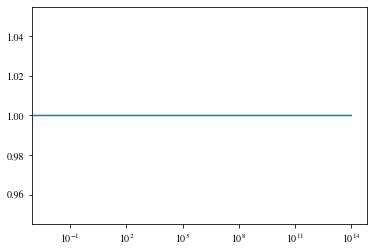

In [59]:
plt.plot(z_ar,Omega_tot_ar+rho_ur_ar/rho_tot_ar)
plt.xscale('log')

background plot

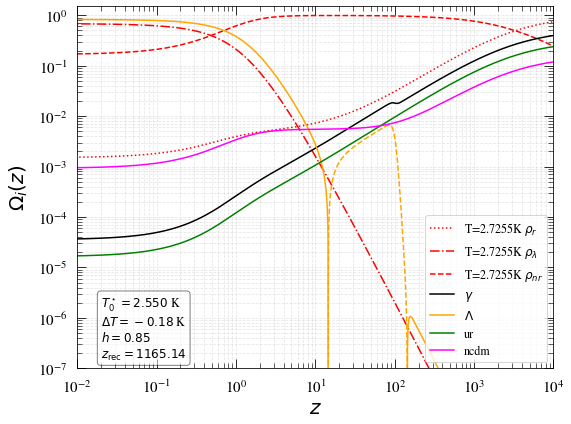

In [72]:
x_min = max(1e-2,np.min(z_firas_ar))
x_max = min(1e4,np.max(z_firas_ar))

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 1e-7
ymax = 1.5


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$z$',size=title_size)
ax.set_ylabel(r'$\Omega_i(z)$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(z_firas_ar,(rho_g_firas_ar+rho_ur_ar+rho_ncdm_ar)/rho_tot_firas_ar, c='r', ls = ':', label = r'T=2.7255K $\rho_r$')
ax.plot(z_firas_ar,rho_lambda_firas_ar/rho_tot_firas_ar, c='r', ls = '-.', label = r'T=2.7255K $\rho_\lambda$')
ax.plot(z_firas_ar,Omega_cb_ar, c='r', ls = '--', label = r'T=2.7255K $\rho_{nr}$')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-',label=r'$\gamma$')[0] for _ in range(1)]
linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]

linesp2 = [ax1.plot([], [],c='orange',ls='-',label=r'$\Lambda$')[0] for _ in range(1)]
linesm2 = [ax1.plot([], [],c='orange',ls='--')[0] for _ in range(1)]

linesp3 = [ax1.plot([], [],c='green',ls='-',label='ur')[0] for _ in range(1)]

linesp4 = [ax1.plot([], [],c='magenta',ls='-',label='ncdm')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  + linesm1  + linesp2 + linesm2  + linesp3+ text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(z_bg[i],rho_g_bg[i]/rho_tot_bg[i])
            #line.set_label('total')
    for j,line in enumerate(linesm1):
        if j==0:
            line.set_data(z_bg[i],-rho_g_bg[i]/rho_tot_bg[i])
    for j,line in enumerate(linesp2):
        if j==0:
            line.set_data(z_bg[i],rho_lambda_bg[i]/rho_tot_bg[i])
    for j,line in enumerate(linesm2):
        if j==0:
            line.set_data(z_bg[i],-rho_lambda_bg[i]/rho_tot_bg[i])
            #line.set_label('late isw')
    for j,line in enumerate(linesp3):
        if j==0:
            line.set_data(z_bg[i],rho_ur_bg[i]/rho_tot_bg[i])
    for j,line in enumerate(linesp4):
        if j==0:
            line.set_data(z_bg[i],rho_ncdm_bg[i]/rho_tot_bg[i])
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(var_array[i])
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(var_array[i]-2.7255)
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.20, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=4,fontsize=12)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_T0_star_bg.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

No handles with labels found to put in legend.


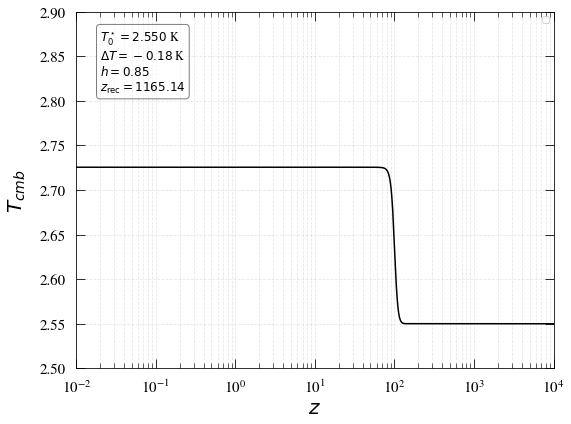

In [45]:
x_min = max(1e-2,np.min(z_firas_ar))
x_max = min(1e4,np.max(z_firas_ar))

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 2.5
ymax = 2.9


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('linear')

ax.set_xlabel(r'$z$',size=title_size)
ax.set_ylabel(r'$T_{cmb}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


# ax.plot(z_firas_ar,T_cmb_firas_ar, c='r', ls = ':', label = r'T=2.7255K')
# ax.plot(z_firas_ar,rho_lambda_firas_ar/rho_tot_firas_ar, c='r', ls = '-.', label = r'T=2.7255K $\rho_\lambda$')
f_T_cmb_firas = interpolate.interp1d(z_firas_ar,T_cmb_firas_ar)

# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]

# linesp2 = [ax1.plot([], [],c='orange',ls='-')[0] for _ in range(1)]
# linesm2 = [ax1.plot([], [],c='orange',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  #+ linesm1  + linesp2 + linesm2 + text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(z_bg[i],T_cmb_bg[i]/(1.+z_bg[i]))
            #line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(z_bg[i],-rho_g_bg[i]/rho_tot_bg[i])
#     for j,line in enumerate(linesp2):
#         if j==0:
#             line.set_data(z_bg[i],rho_lambda_bg[i]/rho_tot_bg[i])
#     for j,line in enumerate(linesm2):
#         if j==0:
#             line.set_data(z_bg[i],-rho_lambda_bg[i]/rho_tot_bg[i])
            #line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(var_array[i])
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(var_array[i]-2.7255)
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_T0_star_bg.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

In [39]:
i = 0
-(T_cmb_bg[i]-f_T_cmb_firas(z_bg[i]))/f_T_cmb_firas(z_bg[i])

array([6.43918547e-02, 6.43918547e-02, 6.43918547e-02, ...,
       1.33060733e-10, 1.32872327e-10, 1.32721490e-10])

late isw contribution
with redshift before z_h

In [18]:
# # requires ffmpeg
# # on mac the conda-forge install seem to crash due to wrongly assigned files
# # the easiest see to be to install ffmpeg via brew (make sure to have deleted to conda ffmpeg)
# T0_values= np.linspace(2.1,3.3,10)

# var_name = 'T0_star'
# var_array = T0_values
# var_num = len(var_array)
# var_legend = r'$T_0^\star$'

nx = len(var_array)
x_lisw = []
y_lisw = []

for i,var in enumerate(var_array):
    #T0 = T0_values[i]

    common_settings = {'output':'tCl,pCl,lCl,mPk',
                       'temperature contributions': 'lisw',
                       'early/late isw redshift': 150.,
                       'lensing':'yes',
                       '100*theta_s': 1.04110,
                       'recombination':'HyRec',
                       'n_s':0.9649,
                       'tau_reio':0.0525,
                       'k_pivot':0.05,
                       'z_h' : z_h,
                       'delta_z_h' : delta_z_h,
                       'P_k_max_1/Mpc':100.0,
                       'l_switch_limber':9}

    var_alpha = 1.
    omega_cdm = 0.12*(var/2.7255)**3
    omega_b = 0.02237*(var/2.7255)**3
    As = 2.089e-9*(2.7255/var)**(0.9649-1)

    
    print(' * Compute with %s=%e'%(var_name,var))
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
    M.set({'A_s':As})
    M.set({var_name:var})
    M.compute()
    clM = M.lensed_cl(2500)
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    x_lisw.append(ll)
    y_lisw.append(clTT)

    

 * Compute with T0_star=2.400000e+00
 * Compute with T0_star=2.500000e+00
 * Compute with T0_star=2.600000e+00
 * Compute with T0_star=2.700000e+00
 * Compute with T0_star=2.800000e+00
 * Compute with T0_star=2.900000e+00
 * Compute with T0_star=3.000000e+00
 * Compute with T0_star=3.100000e+00
 * Compute with T0_star=3.200000e+00


TT plot

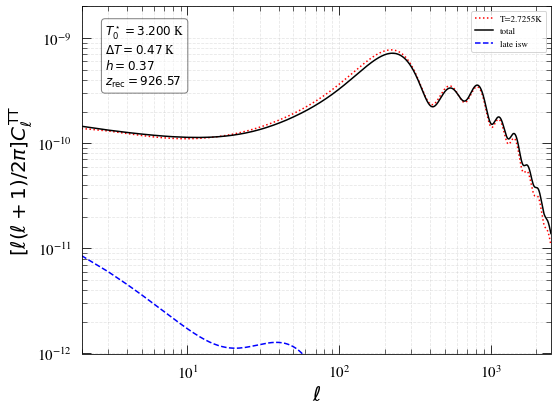

In [19]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 1e-12
ymax = 2e-9


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas*x_firas*(x_firas+1.)/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  + linesm1 + text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y[i]*x[i]*(x[i]+1.)/2./np.pi)
            line.set_label('total')
    for j,line in enumerate(linesm1):
        if j==0:
            line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
            line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(var_array[i])
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(var_array[i]-2.7255)
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_T0_star.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

TE plot

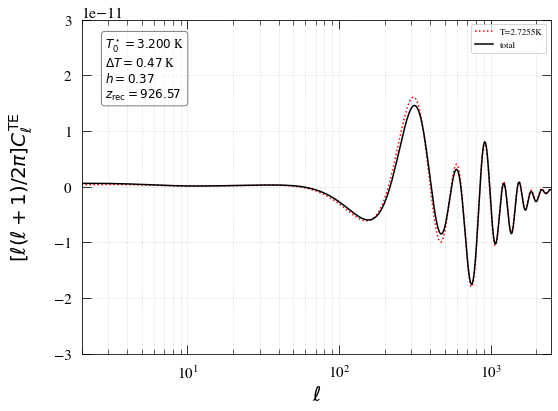

In [20]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = -3e-11
ymax = 3e-11


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('linear')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TE}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas_TE*x_firas*(x_firas+1.)/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  +  text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y_TE[i]*x[i]*(x[i]+1.)/2./np.pi)
            line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
#             line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(var_array[i])
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(var_array[i]-2.7255)
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_T0_star_TE.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

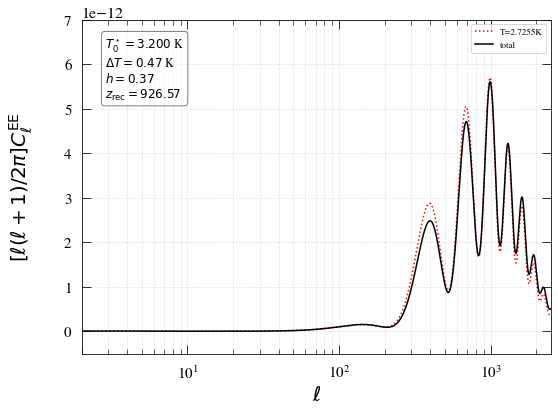

In [23]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = -0.5e-12
ymax = 7e-12


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('linear')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas_EE*x_firas*(x_firas+1.)/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  +  text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y_EE[i]*x[i]*(x[i]+1.)/2./np.pi)
            line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
#             line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(var_array[i])
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(var_array[i]-2.7255)
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_T0_star_EE.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

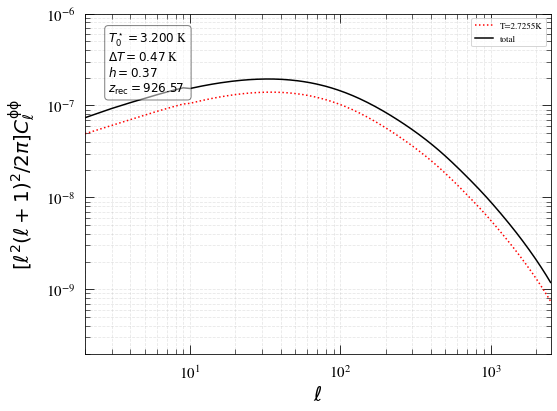

In [26]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 2e-10
ymax = 1e-6


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas_PP*(x_firas*(x_firas+1.))**2/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  +  text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y_PP[i]*(x[i]*(x[i]+1.))**2./2./np.pi)
            line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
#             line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(var_array[i])
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(var_array[i]-2.7255)
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_T0_star_PP.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

# vary zh

In [28]:
# requires ffmpeg
# on mac the conda-forge install seem to crash due to wrongly assigned files
# the easiest see to be to install ffmpeg via brew (make sure to have deleted to conda ffmpeg)
z_h_values= np.linspace(40,900,10)

var_name = 'z_h'
var_array = z_h_values
var_num = len(var_array)
var_legend = r'$z_h$'

In [31]:
nx = len(var_array)
x = []
y = []
y_EE = []
y_TE = []
y_PP = []
hubble_list = []
zrec_list = []
z_h = 100.
delta_z_h = 10.
T0_star = 2.5

index_pb = []
for i,var in enumerate(var_array):
    #T0 = T0_values[i]

    common_settings = {'output':'tCl,pCl,lCl,mPk',
                       'lensing':'yes',
                       '100*theta_s': 1.04110,
                       'recombination':'HyRec',
                       'n_s':0.9649,
                       'tau_reio':0.0525,
                       'k_pivot':0.05,
                       'T0_star': 2.5,
                       'z_h' : z_h,
                       'delta_z_h' : delta_z_h,
                       'P_k_max_1/Mpc':100.0,
                       'l_switch_limber':9}

    var_alpha = 1.
    omega_cdm = 0.12*(T0_star/2.7255)**3
    omega_b = 0.02237*(T0_star/2.7255)**3
    As = 2.089e-9*(2.7255/T0_star)**(0.9649-1)

    
    print(' * Compute with %s=%e'%(var_name,var))
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
    M.set({'A_s':As})
    M.set({var_name:var})
    try:
        M.compute()
    except:
        M.struct_cleanup()  # clean output
        M.empty()           # clean input
        index_pb.append(i)
        continue
        
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    clTE = clM['te'][2:]
    # collect some derived params
    derived = M.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec'])
    h=M.h()
    zrec = derived['z_rec']
    zrec_list.append(zrec)
    hubble_list.append(h)
    zdec = derived['z_d']
    rdec=M.rs_drag()
    print(' * r_s=%f'%(derived['rs_rec']))
    print(' * r_d a_d=%f'%(rdec/(1+zdec)))
    print(' * D_A=%f'%(derived['da_rec']))
    print(' * T_rec=%f'%(var*(1+zrec)))
    print(' * z_rec=%f'%(derived['z_rec']))
    print(' * z_d=%f'%(derived['z_d']))
    print(' * Omega_Lambda=%f'%(derived['Omega_Lambda']))
    print(' * age=%f'%(derived['age']))
    print(' * sigma8=%f'%(derived['sigma8']))
    print(' * h=%f'%(h))
    
    
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    x.append(ll)
    y.append(clTT)
    y_EE.append(clEE)
    y_TE.append(clTE)
    y_PP.append(clPP)

var_array = np.delete(var_array,index_pb)
    

 * Compute with z_h=4.000000e+01
 * r_s=151.153110
 * r_d a_d=0.132878
 * D_A=12.202010
 * T_rec=47594.161736
 * z_rec=1188.854043
 * z_d=1157.216371
 * Omega_Lambda=0.862939
 * age=12.930168
 * sigma8=0.847149
 * h=0.895521
 * Compute with z_h=1.355556e+02
 * r_s=151.153110
 * r_d a_d=0.132879
 * D_A=12.202010
 * T_rec=161291.325883
 * z_rec=1188.854043
 * z_d=1157.213658
 * Omega_Lambda=0.863118
 * age=12.925999
 * sigma8=0.843012
 * h=0.896105
 * Compute with z_h=2.311111e+02
 * r_s=151.153110
 * r_d a_d=0.132880
 * D_A=12.202010
 * T_rec=274988.490031
 * z_rec=1188.854043
 * z_d=1157.204335
 * Omega_Lambda=0.863231
 * age=12.923297
 * sigma8=0.838932
 * h=0.896478
 * Compute with z_h=3.266667e+02
 * r_s=151.153110
 * r_d a_d=0.132884
 * D_A=12.202010
 * T_rec=388685.654178
 * z_rec=1188.854043
 * z_d=1157.183731
 * Omega_Lambda=0.863320
 * age=12.921196
 * sigma8=0.834875
 * h=0.896767
 * Compute with z_h=4.222222e+02
 * r_s=151.153110
 * r_d a_d=0.132892
 * D_A=12.202010
 * T_rec=

late isw contribution
with redshift before z_h

In [32]:
# # requires ffmpeg
# # on mac the conda-forge install seem to crash due to wrongly assigned files
# # the easiest see to be to install ffmpeg via brew (make sure to have deleted to conda ffmpeg)
# T0_values= np.linspace(2.1,3.3,10)

# var_name = 'T0_star'
# var_array = T0_values
# var_num = len(var_array)
# var_legend = r'$T_0^\star$'

nx = len(var_array)
x_lisw = []
y_lisw = []

for i,var in enumerate(var_array):
    #T0 = T0_values[i]

    common_settings = {'output':'tCl,pCl,lCl,mPk',
                       'temperature contributions': 'lisw',
                       'early/late isw redshift': 150.,
                       'lensing':'yes',
                       '100*theta_s': 1.04110,
                       'recombination':'HyRec',
                       'n_s':0.9649,
                       'tau_reio':0.0525,
                       'k_pivot':0.05,
                       'T0_star': 2.5,
                       'z_h' : z_h,
                       'delta_z_h' : delta_z_h,
                       'P_k_max_1/Mpc':100.0,
                       'l_switch_limber':9}

    var_alpha = 1.
    omega_cdm = 0.12*(T0_star/2.7255)**3
    omega_b = 0.02237*(T0_star/2.7255)**3
    As = 2.089e-9*(2.7255/T0_star)**(0.9649-1)

    
    print(' * Compute with %s=%e'%(var_name,var))
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
    M.set({'A_s':As})
    M.set({var_name:var})
    M.compute()
    clM = M.lensed_cl(2500)
    M.struct_cleanup()  # clean output
    M.empty()           # clean input
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    x_lisw.append(ll)
    y_lisw.append(clTT)

    

 * Compute with z_h=4.000000e+01
 * Compute with z_h=1.355556e+02
 * Compute with z_h=2.311111e+02
 * Compute with z_h=3.266667e+02
 * Compute with z_h=4.222222e+02
 * Compute with z_h=5.177778e+02
 * Compute with z_h=6.133333e+02
 * Compute with z_h=7.088889e+02
 * Compute with z_h=8.044444e+02
 * Compute with z_h=9.000000e+02


TT plot

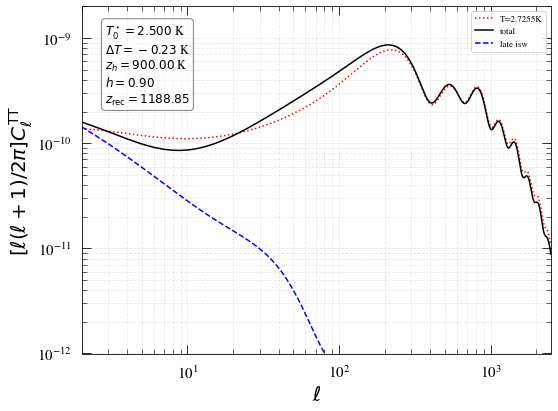

In [34]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 1e-12
ymax = 2e-9


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas*x_firas*(x_firas+1.)/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  + linesm1 + text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y[i]*x[i]*(x[i]+1.)/2./np.pi)
            line.set_label('total')
    for j,line in enumerate(linesm1):
        if j==0:
            line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
            line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(T0_star)
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(T0_star-2.7255)
        text_gamma_str2b = r'$z_h =%.2f$ K'%(var_array[i])
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str2b,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_zh_TT.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

TE plot

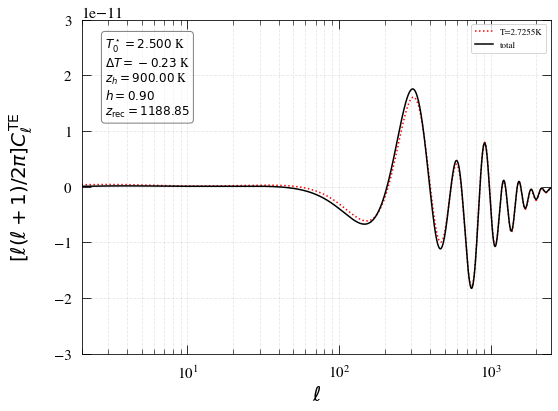

In [35]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = -3e-11
ymax = 3e-11


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('linear')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TE}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas_TE*x_firas*(x_firas+1.)/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  +  text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y_TE[i]*x[i]*(x[i]+1.)/2./np.pi)
            line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
#             line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(T0_star)
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(T0_star-2.7255)
        text_gamma_str2b = r'$z_h =%.2f$ K'%(var_array[i])
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str2b,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_zh_TE.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

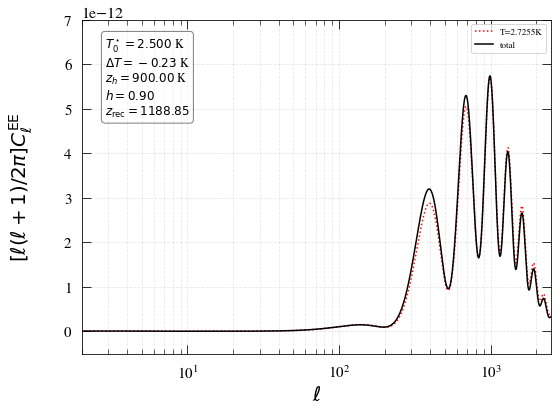

In [36]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = -0.5e-12
ymax = 7e-12


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('linear')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas_EE*x_firas*(x_firas+1.)/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  +  text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y_EE[i]*x[i]*(x[i]+1.)/2./np.pi)
            line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
#             line.set_label('late isw')
        text_gamma[j].remove()
        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(T0_star)
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(T0_star-2.7255)
        text_gamma_str2b = r'$z_h =%.2f$ K'%(var_array[i])
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str2b,
                                    text_gamma_str3,
                                    text_gamma_str4))
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_zh_EE.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

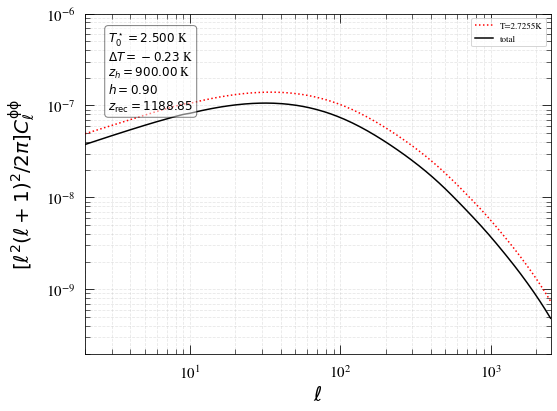

In [37]:
x_min = np.min(x)
x_max = np.max(x)

fig, ax1 = plt.subplots(1,1,figsize=(8,6))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

ymin = 2e-10
ymax = 1e-6


linesp = []
patches = []

ax = ax1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    


ax.plot(x_firas,y_firas_PP*(x_firas*(x_firas+1.))**2/2./np.pi, c='r', ls = ':', label = 'T=2.7255K')


# rect = patches_py.Rectangle((0.1, 0.1), 0.1, 0.1, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='none')
# ax.add_patch(rect)
# rect_full = patches_py.Rectangle((0.1, 0.1), 0.1, 0.05, transform=ax.transAxes,
#                             linewidth=1, edgecolor='b', facecolor='b')
# ax.add_patch(rect_full)






linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
# linesm1 = [ax1.plot([], [],c='b',ls='--')[0] for _ in range(1)]
# text_gamma =  [ax.text(0.05, 0.15, r'$T_0^\star = %.4f$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
#               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
# patches1 = linesp1 +linesm1 + text_gamma 

text_gamma  = [ax.text(0.05, 0.15, '', transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]

patches1 = linesp1  +  text_gamma
patches = patches1



def init():

    for line in linesp1:
        line.set_data([], [])

    return patches

def animate(i):
    for j,line in enumerate(linesp1):
        if j==0:
            line.set_data(x[i],y_PP[i]*(x[i]*(x[i]+1.))**2./2./np.pi)
            line.set_label('total')
#     for j,line in enumerate(linesm1):
#         if j==0:
#             line.set_data(x_lisw[i],y_lisw[i]*x_lisw[i]*(x_lisw[i]+1.)/2./np.pi)
#             line.set_label('late isw')
        text_gamma[j].remove()

        text_gamma_str1 = r'$T_0^\star=%.3f$ K'%(T0_star)
        text_gamma_str2 = r'$\Delta T =%.2f$ K'%(T0_star-2.7255)
        text_gamma_str2b = r'$z_h =%.2f$ K'%(var_array[i])
        text_gamma_str3 = r'$h =%.2f$'%(hubble_list[i])
        text_gamma_str4 = r'$z_\mathrm{rec} =%.2f$'%(zrec_list[i])

        text_gamma_str = '\n'.join((text_gamma_str1,
                                    text_gamma_str2,
                                    text_gamma_str2b,
                                    text_gamma_str3,
                                    text_gamma_str4))    
    
        text_gamma[j] = ax.text(0.05, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, 
                                verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        ax.legend(loc=1,fontsize=9)
    return patches


fig.tight_layout()




anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=800, blit=True)

anim.save('Varying_zh_PP.mp4', fps=3, 
          extra_args=['-vcodec', 'libx264'],
          dpi=100)
i+=1

# Misha's original

 * Compute with T_cmb=2.425000e+00
 * r_s=162.374115
 * r_d a_d=0.138538
 * D_A=12.728358
 * T_rec=2971.420454
 * z_rec=1224.328022
 * z_d=1191.855326
 * Omega_Lambda=0.828084
 * age=14.316331
 * sigma8=0.938166
 * h=0.764056
 * Compute with T_cmb=2.525000e+00
 * r_s=155.939529
 * r_d a_d=0.138528
 * D_A=12.727551
 * T_rec=2971.534419
 * z_rec=1175.845314
 * z_d=1144.661428
 * Omega_Lambda=0.790526
 * age=14.128479
 * sigma8=0.899086
 * h=0.735438
 * Compute with T_cmb=2.625000e+00
 * r_s=149.995451
 * r_d a_d=0.138519
 * D_A=12.726797
 * T_rec=2971.640704
 * z_rec=1131.053602
 * z_d=1101.057938
 * Omega_Lambda=0.745028
 * age=13.949619
 * sigma8=0.860454
 * h=0.706592
 * Compute with T_cmb=2.725000e+00
 * r_s=144.487872
 * r_d a_d=0.138512
 * D_A=12.726092
 * T_rec=2971.739618
 * z_rec=1089.546649
 * z_d=1060.651626
 * Omega_Lambda=0.689757
 * age=13.779024
 * sigma8=0.822161
 * h=0.677520
 * Compute with T_cmb=2.825000e+00
 * r_s=139.370406
 * r_d a_d=0.138504
 * D_A=12.725441
 * T_r

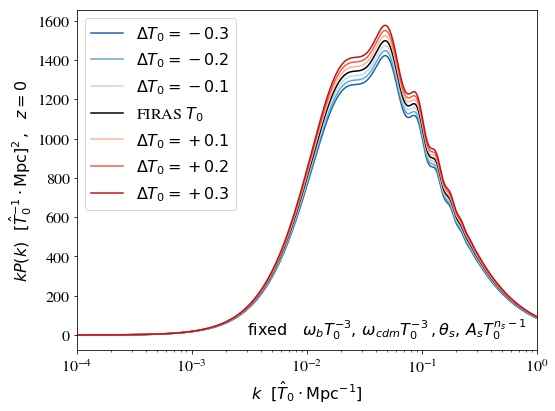

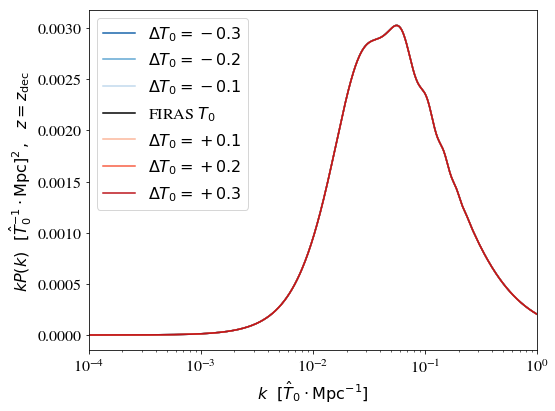

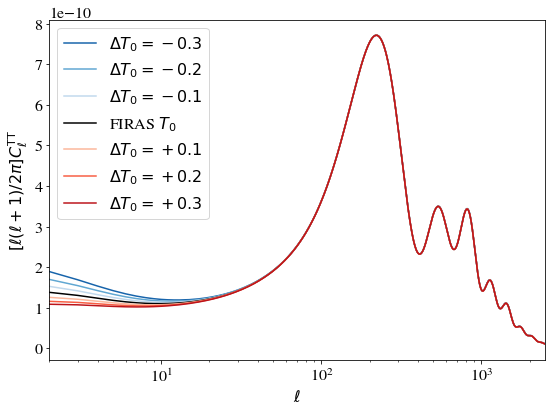

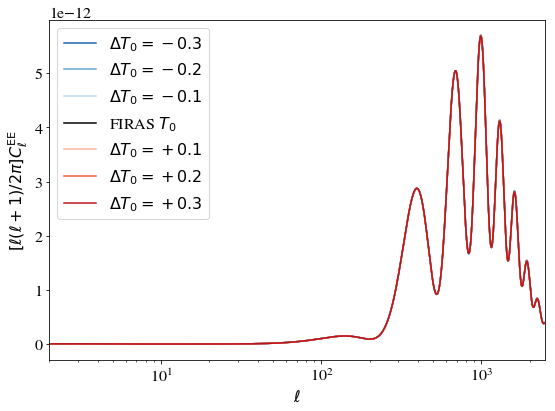

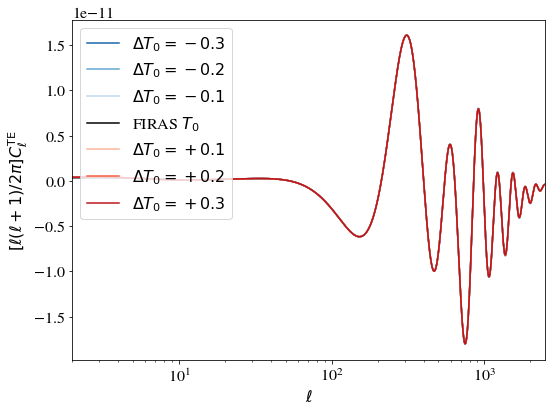

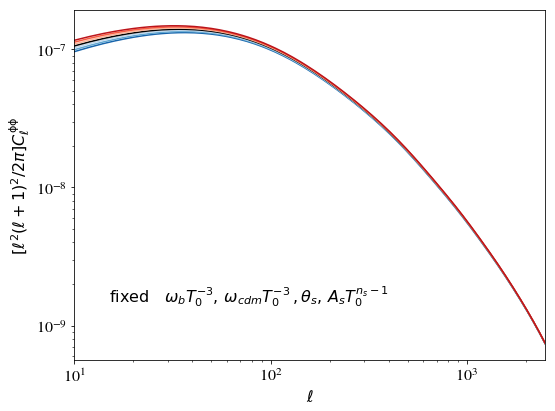

In [3]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'T_cmb'
var_array = np.linspace(2.425,3.025,7)
var_num = len(var_array)
var_legend = r'$T_\mathrm{cmb}$'
var_figname = 'Tcmb'
#
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   '100*theta_s': 1.04110,
                   'recombination':'HyRec',
                   # LambdaCDM parameters
#                    'h':0.6737,
#                    'omega_b':0.02237,
#                    'omega_cdm':0.120,
#                    'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                    'YHe':0.246,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9}
                   #'background_verbose':1}  
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
fig_Pkz, ax_Pkz = plt.subplots()
fig_TT, ax_TT = plt.subplots()
fig_EE, ax_EE = plt.subplots()
fig_TE, ax_TE = plt.subplots()
fig_PP, ax_PP = plt.subplots()
#
# loop over varying parameter values
#1191.287902
z_decs=[1191.287902,1144.085933,1100.504630,1060.120895,1022.593945,987.631692,954.979257]
# z_decs=np.zeros(len(var_array))

for i,var in enumerate(var_array):
    
    var_alpha = 1.
    omega_cdm = 0.12*(var/2.725)**3
    omega_b = 0.02237*(var/2.725)**3
    As = 2.089e-9*(2.725/var)**(0.9649-1)
#     k_piv = 0.05*(var/2.725)
    z_pk =z_decs[i]
#     atoday = 2.725/var;
    #
    print ' * Compute with %s=%e'%(var_name,var)
    #
    # deal with colors and legends
    #
    if i == 3:
        var_color = 'k'
        var_alpha = 1.
        legarray.append(r'FIRAS $T_0$')
    else:
        if i < 3:
            var_color = plt.cm.Blues(0.8*(3-i)/(3))
#         var_color = 'r'
#             var_alpha = 1.*i/(var_num-1)
#     if i == var_num-1:
            legarray.append(r'$\Delta T_{0}=%0.1f$'%(var-2.725))
        if i > 3:
            var_color = plt.cm.Reds(0.8*(i-3)/(3))
#             var_alpha = 1.*i/(var_num-1)
            legarray.append(r'$\Delta T_{0}=+%0.1f$'%(var-2.725))
    
    
        #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({'omega_b':omega_b})
    M.set({'omega_cdm':omega_cdm})
#     M.set({'a_today':atoday})
    M.set({'A_s':As})
    M.set({'z_pk':z_pk})
#     M.set({'k_pivot':k_piv})
    M.set({var_name:var})
    M.compute()
    derived = M.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec'])
    h=M.h()
    zrec=derived['z_rec']
    zdec=derived['z_d']
    rdec=M.rs_drag()
    print ' * r_s=%f'%(derived['rs_rec'])
    print ' * r_d a_d=%f'%(rdec/(1+zdec))
    print ' * D_A=%f'%(derived['da_rec'])
    print ' * T_rec=%f'%(var*(1+zrec))
    print ' * z_rec=%f'%(derived['z_rec'])
    print ' * z_d=%f'%(derived['z_d'])
    print ' * Omega_Lambda=%f'%(derived['Omega_Lambda'])
    print ' * age=%f'%(derived['age'])
    print ' * sigma8=%f'%(derived['sigma8'])
    print ' * h=%f'%(h)
    
    #
    # get Cls
    #
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    clTE = clM['te'][2:]
    #
    # get P(k) for common k values
    #
    pkM = []
    pkMz = []
    for k in kvec:
        heff = (2.725/var)**(1.)
        pkM.append(M.pk(k/heff,0.)*k/heff**3)
        pkMz.append(M.pk(k/heff,z_pk)*k/heff**3)
    #    
    # plot P(k)
    #
    ax_Pk.semilogx(kvec,np.array(pkM),color=var_color,alpha=var_alpha,linestyle='-')
    ax_Pkz.semilogx(kvec,np.array(pkMz),color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
#     ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl EE 
    #
    ax_EE.semilogx(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    ax_TE.semilogx(ll,clTE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')

#     ax_EE.semilogy(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl phiphi
    #
    ax_PP.loglog(ll,clPP*ll*(ll+1)*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    M.empty()    
#
# output of P(k) figure
#
ax_Pk.set_xlim([1.e-4,1.])
ax_Pk.set_xlabel(r'$k \,\,\,\, [\hat{T}_0\cdot\mathrm{Mpc}^{-1}]$')
ax_Pk.set_ylabel(r'$kP(k) \,\,\,\, [\hat{T}_0^{-1}\cdot\mathrm{Mpc}]^2\,, \,\,\,\, z=0$')
ax_Pk.annotate(r'${\rm fixed}\quad \omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}$',
                 xy=(3e-3,0),
                 xytext=(3e-3,0)
              )
ax_Pk.legend(legarray)
fig_Pk.tight_layout()
fig_Pk.savefig('spectra_%s_Pk.pdf' % var_figname)

ax_Pkz.set_xlim([1.e-4,1.])
ax_Pkz.set_xlabel(r'$k \,\,\,\, [\hat{T}_0\cdot\mathrm{Mpc}^{-1}]$')
ax_Pkz.set_ylabel(r'$kP(k) \,\,\,\, [\hat{T}_0^{-1}\cdot\mathrm{Mpc}]^2\,, \,\,\,\, z=z_{\rm dec}$')
ax_Pkz.legend(legarray)
fig_Pkz.tight_layout()
fig_Pkz.savefig('spectra_%s_Pkz.pdf' % var_figname)

#
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)
#


# output of C_l^EE figure
#    
ax_EE.set_xlim([2,2500])
ax_EE.set_xlabel(r'$\ell$')
ax_EE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
ax_EE.legend(legarray)
fig_EE.tight_layout()
fig_EE.savefig('spectra_%s_clee.pdf' % var_figname)


ax_TE.set_xlim([2,2500])
ax_TE.set_xlabel(r'$\ell$')
ax_TE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TE}$')
ax_TE.legend(legarray)
fig_TE.tight_layout()
fig_TE.savefig('spectra_%s_clte.pdf' % var_figname)
# ax_TE.annotate(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                  xy=(3,1e-11),
#                  xytext=(3,1e-11))
# ax_TE.legend(fontsize='8',ncol=1,loc='lower left')
# ax_TE.legend(legarray.append(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$'))


#
# output of C_l^pp figure
#   
ax_PP.set_xlim([10,2500])
ax_PP.set_xlabel(r'$\ell$')
ax_PP.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$')
ax_PP.annotate(r'${\rm fixed}\quad \omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}$',
#                loc='lower left'
                 xy=(15,1.5e-9),
                 xytext=(15,1.5e-9)
              )
# ax_PP.legend(legarray)
# ax_PP.legend(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                loc='lower left'
# #                  xy=(10.5,1e-9),
# #                  xytext=(10.5,1e-9)
#               )
fig_PP.tight_layout()
fig_PP.savefig('spectra_%s_clpp.pdf' % var_figname)

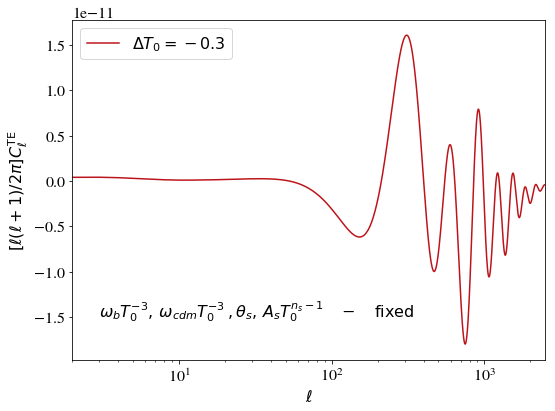

In [4]:
fig_TE, ax_TE = plt.subplots()
ax_TE.semilogx(ll,clTE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
ax_TE.set_xlim([2,2500])
ax_TE.set_xlabel(r'$\ell$')
ax_TE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TE}$')
ax_TE.annotate(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3}\,, \theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$',
#                loc='lower left'
                 xy=(3,-1.5e-11),
                 xytext=(3,-1.5e-11)
              )
# ax_TE.legend(fontsize='8',ncol=1,loc='lower left')
# ax_TE.legend(legarray.append(r'$\omega_b T_0^{-3},\,\omega_{cdm} T_0^{-3},\,\theta_s,\, A_s T_0^{n_s-1}\quad-\quad{\rm fixed}$'))
ax_TE.legend(legarray)
fig_TE.tight_layout()
fig_TE.savefig('spectra_%s_clte.pdf' % var_figname)

In [5]:
wCDM = Class()
wCDM.set({'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   '100*theta_s': 1.04110,
                   'recombination':'HyRec',
                   # LambdaCDM parameters
#                    'h':0.6737,
                    'omega_b':0.02237,
                    'omega_cdm':0.120,
                      'Omega_fld':0.7,
                    'w0_fld':-1.,
#                     'wa_fld':0.,
#                     'cs2_fld':0.,
                    'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                    'YHe':0.246,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9})
wCDM.compute()
print(wCDM.h())

0.6774981


In [4]:
Crazy = Class()
Crazy.set({'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
#                    '100*theta_s': 1.04110,
                   'recombination':'HyRec',
                   # LambdaCDM parameters
                   'h':0.4350263,
                    'omega_b':0.0472959,
                    'omega_cdm':0.2543286,
                    'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                    'T_cmb':3.513327,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9})
Crazy.compute()
derived = Crazy.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec','100*theta_s'])
zrec=derived['z_rec']
zdec=derived['z_d']
theta_s=derived['100*theta_s']
rdec=Crazy.rs_drag()
print(' * r_s=%f'%(derived['rs_rec']))
print(' * r_d a_d=%f'%(rdec/(1+zdec)))
print(' * D_A=%f'%(derived['da_rec']))
print(' * T_rec=%f'%(var*(1+zrec)))
print(' * z_rec=%f'%(derived['z_rec']))
print(' * z_d=%f'%(derived['z_d']))
print(' * Omega_Lambda=%f'%(derived['Omega_Lambda']))
print(' * age=%f'%(derived['age']))
print(' * sigma8=%f'%(derived['sigma8']))
print(' * h=%f'%(h))
print(' * 100*theta_s=%f'%(theta_s))

 * r_s=112.515420
 * r_d a_d=0.139260
 * D_A=12.805945
 * T_rec=2559.284795
 * z_rec=845.044560
 * z_d=821.842175
 * Omega_Lambda=-0.594417
 * age=12.760608
 * sigma8=0.515051
 * h=0.588759
 * 100*theta_s=1.038502


# Misha's original

In [6]:
Crazy = Class()
Crazy.set({'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
#                    '100*theta_s': 1.04110,
                   'recombination':'HyRec',
                   # LambdaCDM parameters
                   'h':0.4350263,
                    'omega_b':0.0472959,
                    'omega_cdm':0.2543286,
                    'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.0525,
                   'k_pivot':0.05,
                    'T_cmb':3.513327,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':100.0,
                   'l_switch_limber':9})
Crazy.compute()
derived = Crazy.get_current_derived_parameters(['rs_rec','da_rec','z_d','Omega_Lambda','age','sigma8','z_rec','100*theta_s'])
zrec=derived['z_rec']
zdec=derived['z_d']
theta_s=derived['100*theta_s']
rdec=Crazy.rs_drag()
print ' * r_s=%f'%(derived['rs_rec'])
print ' * r_d a_d=%f'%(rdec/(1+zdec))
print ' * D_A=%f'%(derived['da_rec'])
print ' * T_rec=%f'%(var*(1+zrec))
print ' * z_rec=%f'%(derived['z_rec'])
print ' * z_d=%f'%(derived['z_d'])
print ' * Omega_Lambda=%f'%(derived['Omega_Lambda'])
print ' * age=%f'%(derived['age'])
print ' * sigma8=%f'%(derived['sigma8'])
print ' * h=%f'%(h)
print ' * 100*theta_s=%f'%(theta_s)

 * r_s=112.515420
 * r_d a_d=0.139260
 * D_A=12.805945
 * T_rec=2559.284795
 * z_rec=845.044560
 * z_d=821.842175
 * Omega_Lambda=-0.594417
 * age=12.760608
 * sigma8=0.515051
 * h=0.588969
 * 100*theta_s=1.038502
